In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [57]:
df = pd.read_csv('Raw_Dataset_with_Issues.csv')
print(df.head())

   Unnamed: 0  Customer_ID   Age   Salary      City  Gender  Purchase_Amount  \
0           0            1  40.0  70000.0  New York     NaN              619   
1           1            2  45.0  30000.0   Houston  Female             1945   
2           2            3  35.0  30000.0  New York    Male             2783   
3           3            4  45.0  30000.0       NaN   Other             3913   
4           4            5  45.0  30000.0  New York    Male             4771   

  Signup_Date Marital_Status Education  
0  2022-01-01        Widowed       PhD  
1  2022-01-02         Single       PhD  
2  2022-01-03            NaN    Master  
3  2022-01-04        Married  Bachelor  
4  2022-01-05        Married       NaN  


In [58]:
#1. IDENTIFYING MISSING VALUES
missing_columns = df.columns[df.isnull().any()].tolist()
print(f"Columns with missing values: {missing_columns}")

#FILLING MISSING VALUES
df_mean_filled = df.copy()
df_mean_filled['Age'].fillna(df_mean_filled['Age'].mean(), inplace=True)
df_mean_filled['Salary'].fillna(df_mean_filled['Salary'].mean(), inplace=True)
df_mean_filled['City'].fillna('Unknown', inplace=True)
df_mean_filled['Gender'].fillna('Unknown', inplace=True)
df_mean_filled['Marital_Status'].fillna('Unknown', inplace=True)
df_mean_filled['Education'].fillna('Unknown', inplace=True)

Columns with missing values: ['Age', 'Salary', 'City', 'Gender', 'Marital_Status', 'Education']


C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_5240\3118776029.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean_filled['Age'].fillna(df_mean_filled['Age'].mean(), inplace=True)
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_5240\3118776029.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [59]:
# 2. IDENTIFYING DUPLICATES
duplicates = df[df.duplicated()]
print(f"\nDuplicate Rows:\n{duplicates}")
#HANDLING DUPLICATES
df_no_duplicates = df.drop_duplicates()


Duplicate Rows:
     Unnamed: 0  Customer_ID   Age   Salary      City  Gender  \
100           0            1  40.0  70000.0  New York     NaN   
101           1            2  45.0  30000.0   Houston  Female   
102           2            3  35.0  30000.0  New York    Male   
103           3            4  45.0  30000.0       NaN   Other   
104           4            5  45.0  30000.0  New York    Male   

     Purchase_Amount Signup_Date Marital_Status Education  
100              619  2022-01-01        Widowed       PhD  
101             1945  2022-01-02         Single       PhD  
102             2783  2022-01-03            NaN    Master  
103             3913  2022-01-04        Married  Bachelor  
104             4771  2022-01-05        Married       NaN  


In [60]:
#3. CATEGORICAL DATA STANDARDIZATION
def standardize_categorical(df, column, mapping):
    df[column] = df[column].map(mapping)
    return df

city_mapping = {
    'New York': 'New York',
    'New-York': 'New York',
    'Los Angeles': 'Los Angeles',
    'LA': 'Los Angeles',
    'Houston': 'Houston',
    'Chicago': 'Chicago',
    'Phoenix': 'Phoenix'
}

gender_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'M': 'Male',
    'F': 'Female',
    'Other': 'Other',
    'nan': np.nan
}
df = standardize_categorical(df, 'City', city_mapping)
df = standardize_categorical(df, 'Gender', gender_mapping)
print(df.head())


   Unnamed: 0  Customer_ID   Age   Salary      City  Gender  Purchase_Amount  \
0           0            1  40.0  70000.0  New York     NaN              619   
1           1            2  45.0  30000.0   Houston  Female             1945   
2           2            3  35.0  30000.0  New York    Male             2783   
3           3            4  45.0  30000.0       NaN   Other             3913   
4           4            5  45.0  30000.0  New York    Male             4771   

  Signup_Date Marital_Status Education  
0  2022-01-01        Widowed       PhD  
1  2022-01-02         Single       PhD  
2  2022-01-03            NaN    Master  
3  2022-01-04        Married  Bachelor  
4  2022-01-05        Married       NaN  


In [61]:
#4. OUTLIER DETECTION AND HANDLING
#IQR Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#Z-Score Method
def detect_outliers_zscore(df, column):
    z = np.abs(stats.zscore(df[column]))
    return df[z > 3]

    # Detecting outliers in 'Age' column using IQR method
    outliers_iqr_age = detect_outliers_iqr(df, 'Age')
    print(f"Outliers in 'Age' column using IQR method:\n{outliers_iqr_age}")

    # Detecting outliers in 'Salary' column using Z-Score method
    outliers_zscore_salary = detect_outliers_zscore(df, 'Salary')
    print(f"\nOutliers in 'Salary' column using Z-Score method:\n{outliers_zscore_salary}")

  

In [62]:
#5.Create Age_Group column
def categorize_age(age):
    if 18 <= age <= 30:
        return 'Young'
    elif 31 <= age <= 50:
        return 'Middle-Aged'
    elif age >= 51:
        return 'Senior'
    else:
        return np.nan
df['Age_Group'] = df['Age'].apply(categorize_age)
df.head()    




,Unnamed: 0,Customer_ID,Age,Salary,City,Gender,Purchase_Amount,Signup_Date,Marital_Status,Education,Age_Group
0,0,1,40.0,70000.0,New York,NaN,619,2022-01-01,Widowed,PhD,Middle-Aged
1,1,2,45.0,30000.0,Houston,Female,1945,2022-01-02,Single,PhD,Middle-Aged
2,2,3,35.0,30000.0,New York,Male,2783,2022-01-03,NaN,Master,Middle-Aged
3,3,4,45.0,30000.0,NaN,Other,3913,2022-01-04,Married,Bachelor,Middle-Aged
4,4,5,45.0,30000.0,New York,Male,4771,2022-01-05,Married,NaN,Middle-Aged


In [1]:
#
# VISUALIZATIONS
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group')
plt.title('Distribution of Customers by Age Group')
plt.show()

NameError: name 'plt' is not defined

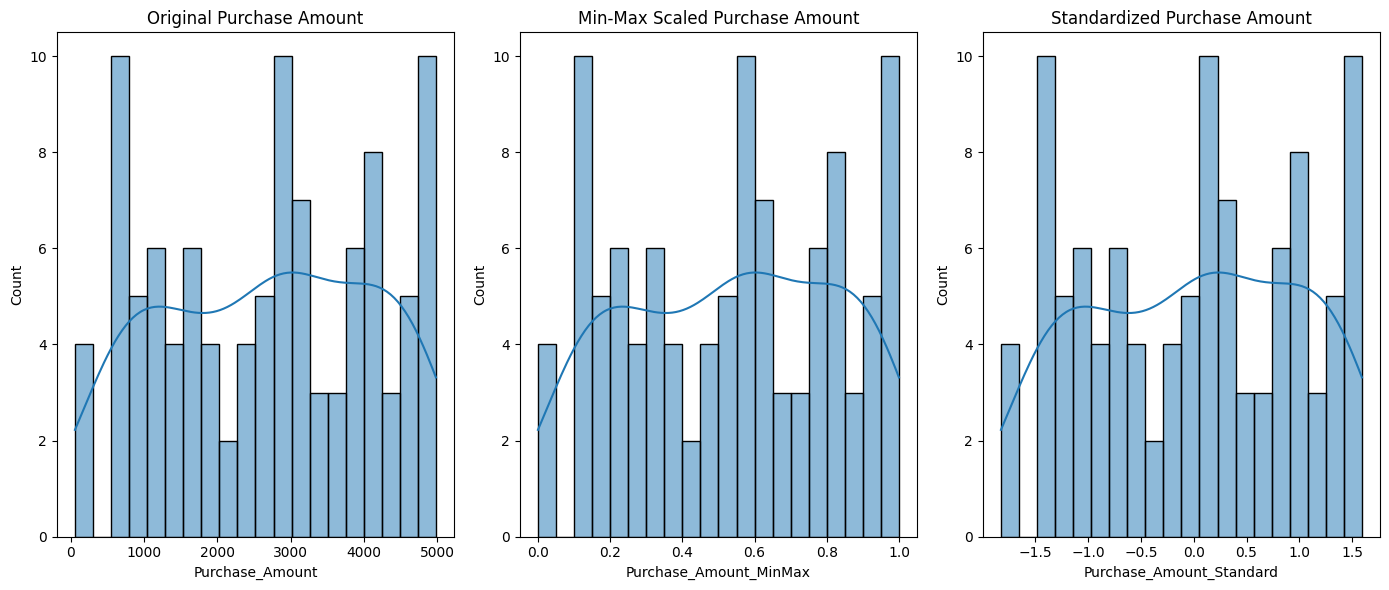

In [64]:
#6. DATA TRANSFORMATION
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

df['Purchase_Amount_MinMax'] = scaler_minmax.fit_transform(df[['Purchase_Amount']])
df['Purchase_Amount_Standard'] = scaler_standard.fit_transform(df[['Purchase_Amount']])

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Purchase_Amount'], bins=20, kde=True)
plt.title('Original Purchase Amount')

plt.subplot(1, 3, 2)
sns.histplot(df['Purchase_Amount_MinMax'], bins=20, kde=True)
plt.title('Min-Max Scaled Purchase Amount')

plt.subplot(1, 3, 3)
sns.histplot(df['Purchase_Amount_Standard'], bins=20, kde=True)
plt.title('Standardized Purchase Amount')

plt.tight_layout()
plt.show()

In [66]:
#7. ECODING CATEGORICAL VARIABLES
# One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=['City', 'Gender', 'Marital_Status', 'Education'])



print("\nOne-Hot Encoded DataFrame:")
print(df_onehot.head())






One-Hot Encoded DataFrame:
   Unnamed: 0  Customer_ID   Age   Salary  Purchase_Amount Signup_Date  \
0           0            1  40.0  70000.0              619  2022-01-01   
1           1            2  45.0  30000.0             1945  2022-01-02   
2           2            3  35.0  30000.0             2783  2022-01-03   
3           3            4  45.0  30000.0             3913  2022-01-04   
4           4            5  45.0  30000.0             4771  2022-01-05   

     Age_Group  Purchase_Amount_MinMax  Purchase_Amount_Standard  \
0  Middle-Aged                0.114628                 -1.431984   
1  Middle-Aged                0.383648                 -0.513162   
2  Middle-Aged                0.553662                  0.067511   
3  Middle-Aged                0.782917                  0.850519   
4  Middle-Aged                0.956989                  1.445050   

   City_Chicago  ...  Gender_Other  Marital_Status_Divorced  \
0         False  ...         False                    F

In [70]:
# Label Encoding
label_encoder = LabelEncoder()
df_label_encoded = df.copy()
for column in ['City', 'Gender', 'Marital_Status', 'Education']:
    df_label_encoded[column] = label_encoder.fit_transform(df_label_encoded[column].astype(str))
    
print("\nLabel Encoded DataFrame:")
print(df_label_encoded.head())
    



Label Encoded DataFrame:
   Unnamed: 0  Customer_ID   Age   Salary  City  Gender  Purchase_Amount  \
0           0            1  40.0  70000.0     3       3              619   
1           1            2  45.0  30000.0     1       0             1945   
2           2            3  35.0  30000.0     3       1             2783   
3           3            4  45.0  30000.0     5       2             3913   
4           4            5  45.0  30000.0     3       1             4771   

  Signup_Date  Marital_Status  Education    Age_Group  Purchase_Amount_MinMax  \
0  2022-01-01               3          3  Middle-Aged                0.114628   
1  2022-01-02               2          3  Middle-Aged                0.383648   
2  2022-01-03               4          2  Middle-Aged                0.553662   
3  2022-01-04               1          0  Middle-Aged                0.782917   
4  2022-01-05               1          5  Middle-Aged                0.956989   

   Purchase_Amount_Standard  


In [72]:
df_target_encoded = df.copy()
for column in ['City', 'Gender', 'Marital_Status', 'Education']:
    target_mean = df.groupby(column)['Purchase_Amount'].mean()
    df_target_encoded[column] = df[column].map(target_mean)


print("\nTarget Encoded DataFrame:")
print(df_target_encoded.head())
    


Target Encoded DataFrame:
   Unnamed: 0  Customer_ID   Age   Salary         City       Gender  \
0           0            1  40.0  70000.0  2798.428571          NaN   
1           1            2  45.0  30000.0  2599.521739  2177.761905   
2           2            3  35.0  30000.0  2798.428571  2925.000000   
3           3            4  45.0  30000.0          NaN  3087.500000   
4           4            5  45.0  30000.0  2798.428571  2925.000000   

   Purchase_Amount Signup_Date  Marital_Status    Education    Age_Group  \
0              619  2022-01-01     2267.619048  2083.272727  Middle-Aged   
1             1945  2022-01-02     2688.833333  2083.272727  Middle-Aged   
2             2783  2022-01-03             NaN  2993.941176  Middle-Aged   
3             3913  2022-01-04     3094.590909  2340.555556  Middle-Aged   
4             4771  2022-01-05     3094.590909          NaN  Middle-Aged   

   Purchase_Amount_MinMax  Purchase_Amount_Standard  
0                0.114628          